In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [3]:
df=pd.read_csv('housing.csv')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [5]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [9]:
df.total_bedrooms.head(10)

0     129.0
1    1106.0
2     190.0
3     235.0
4     280.0
5     213.0
6     489.0
7     687.0
8     665.0
9     707.0
Name: total_bedrooms, dtype: float64

(array([1.5304e+04, 4.1460e+03, 6.8200e+02, 1.7700e+02, 7.0000e+01,
        2.3000e+01, 1.8000e+01, 8.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([1.0000e+00, 6.4540e+02, 1.2898e+03, 1.9342e+03, 2.5786e+03,
        3.2230e+03, 3.8674e+03, 4.5118e+03, 5.1562e+03, 5.8006e+03,
        6.4450e+03]),
 <BarContainer object of 10 artists>)

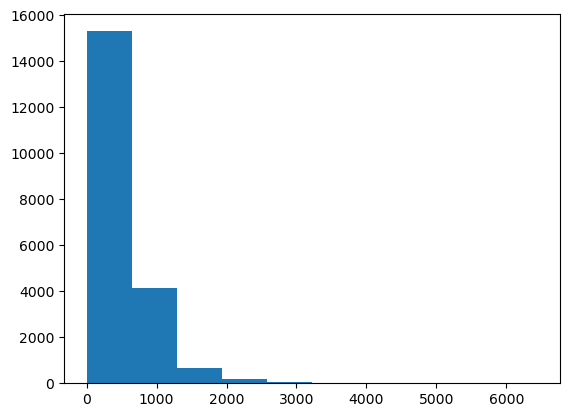

In [10]:
plt.hist(df.total_bedrooms)

In [11]:
median=df.total_bedrooms.median()

In [12]:
median

435.0

In [13]:
# Handling missing value
df['total_bedrooms'].fillna(median,inplace=True)

In [14]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [15]:
#duplicate values
df.duplicated().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x15abb7d40d0>,
 'caps': [<matplotlib.lines.Line2D at 0x15abb7d4670>,
 'boxes': [<matplotlib.lines.Line2D at 0x15abb7c8dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x15abb7d4c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x15abb7d4ee0>],
 'means': []}

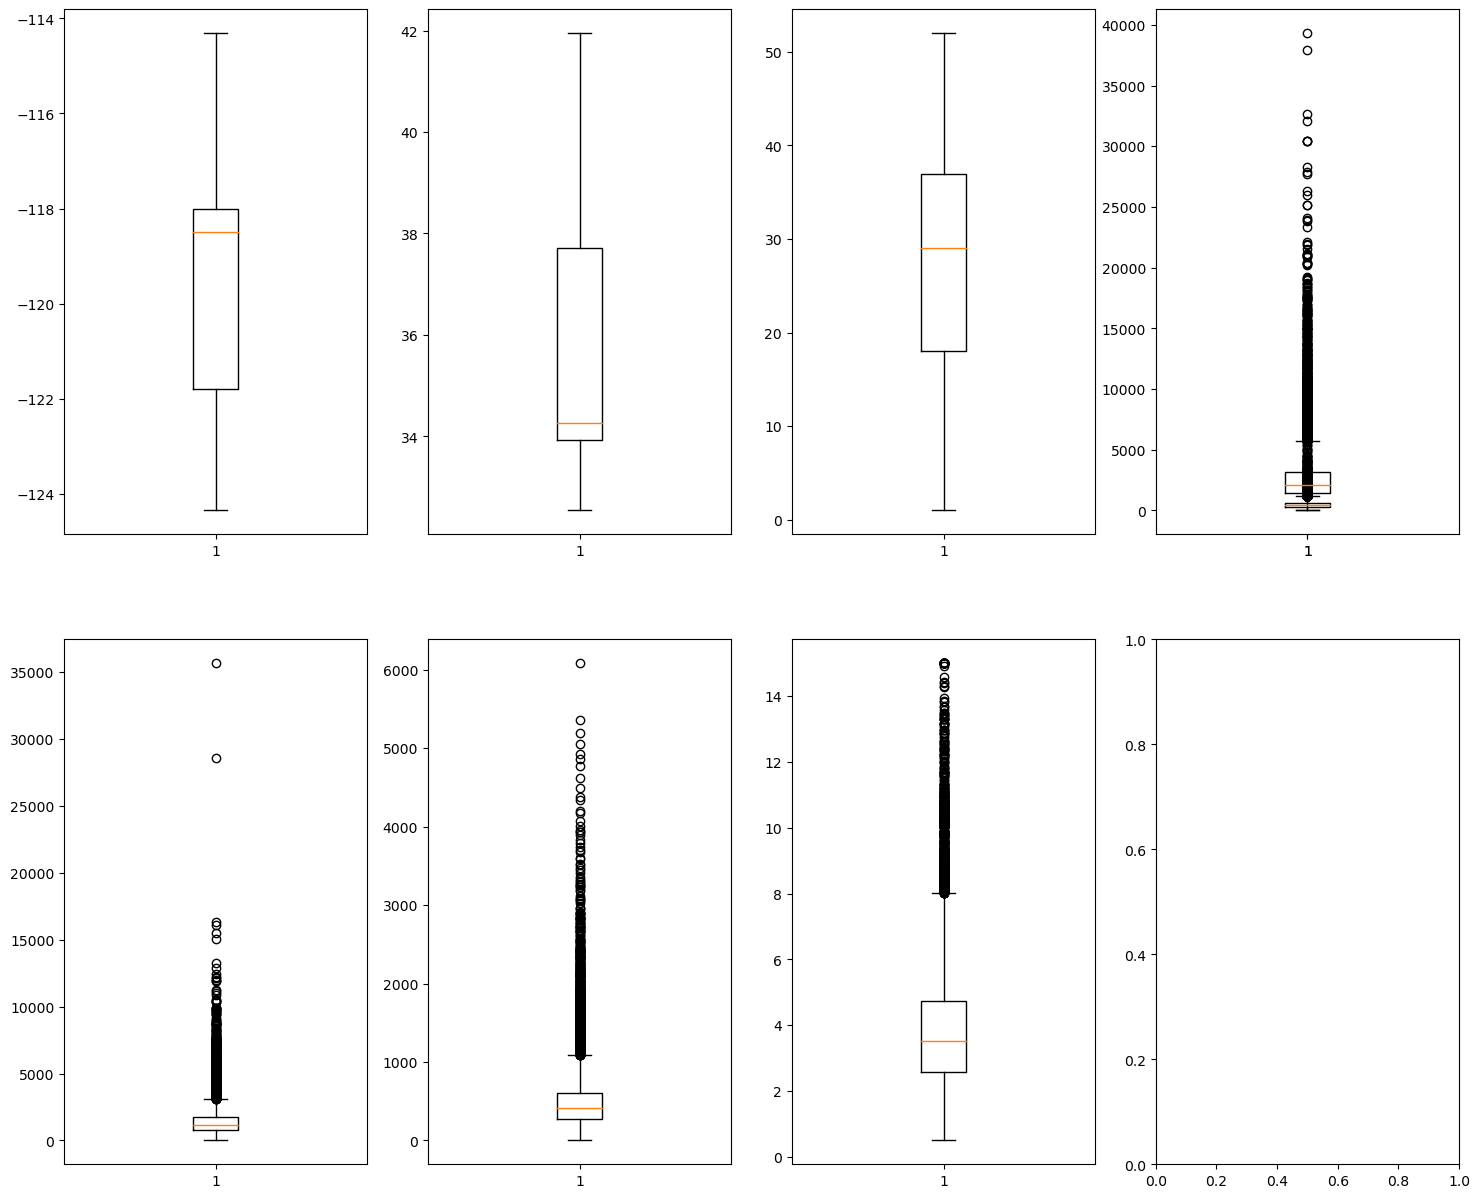

In [16]:
fig,ax = plt.subplots(2, 4)
fig.set_figwidth(18)
fig.set_figheight(15)
ax[0][0].boxplot(df['longitude'])
ax[0][1].boxplot(df['latitude'])
ax[0][2].boxplot(df['housing_median_age'])
ax[0][3].boxplot(df['total_rooms'])
ax[0][3].boxplot(df['total_bedrooms'])
ax[1][0].boxplot(df['population'])
ax[1][1].boxplot(df['households'])
ax[1][2].boxplot(df['median_income'])

In [17]:
# Extreme values Handling
# total_rooms
q1=df['total_rooms'].quantile(0.25)
q3=df['total_rooms'].quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df['total_rooms']=np.where(df['total_rooms']>ul,ul,df['total_rooms'])
df['total_rooms']=np.where(df['total_rooms']<ll,ll,df['total_rooms'])

In [18]:
# Extreme values Handling
# total_bedrooms
q1=df['total_bedrooms'].quantile(0.25)
q3=df['total_bedrooms'].quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df['total_bedrooms']=np.where(df['total_bedrooms']>ul,ul,df['total_bedrooms'])
df['total_bedrooms']=np.where(df['total_bedrooms']<ll,ll,df['total_bedrooms'])

In [19]:
# Extreme values Handling
# population
q1=df['population'].quantile(0.25)
q3=df['population'].quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df['population']=np.where(df['population']>ul,ul,df['population'])
df['population']=np.where(df['population']<ll,ll,df['population'])

In [20]:
# Extreme values Handling
# households
q1=df['households'].quantile(0.25)
q3=df['households'].quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df['households']=np.where(df['households']>ul,ul,df['households'])
df['households']=np.where(df['households']<ll,ll,df['households'])

In [21]:
# Extreme values Handling
# median_income
q1=df['median_income'].quantile(0.25)
q3=df['median_income'].quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df['median_income']=np.where(df['median_income']>ul,ul,df['median_income'])
df['median_income']=np.where(df['median_income']<ll,ll,df['median_income'])

In [22]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [23]:
df.ocean_proximity.nunique()

5

In [24]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880.000,129.0,322.0,126.0,8.013025,NEAR BAY,452600
1,-122.22,37.86,21,5698.375,1106.0,2401.0,1092.5,8.013025,NEAR BAY,358500
2,-122.24,37.85,52,1467.000,190.0,496.0,177.0,7.257400,NEAR BAY,352100
3,-122.25,37.85,52,1274.000,235.0,558.0,219.0,5.643100,NEAR BAY,341300
4,-122.25,37.85,52,1627.000,280.0,565.0,259.0,3.846200,NEAR BAY,342200


C:\Users\rakes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


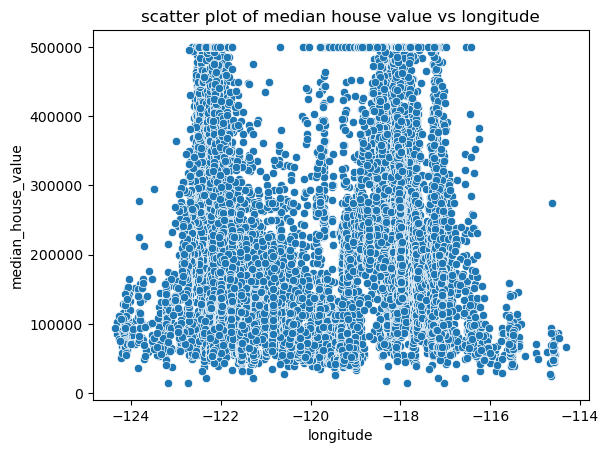

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


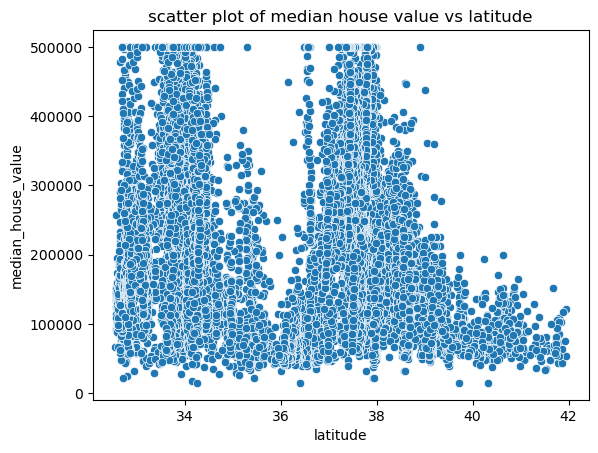

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


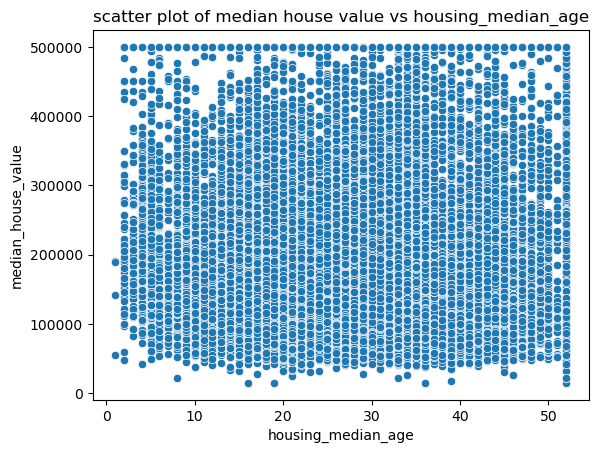

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


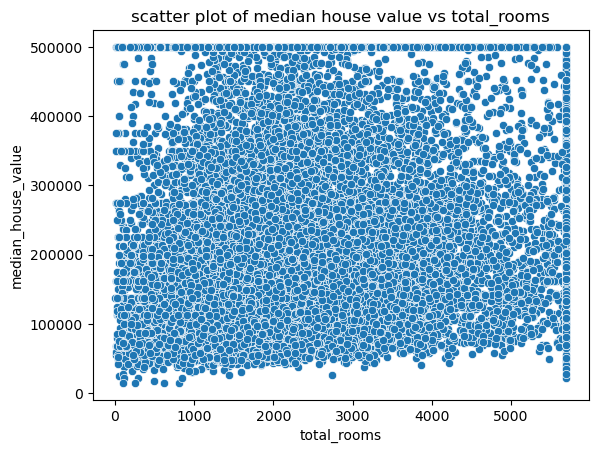

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


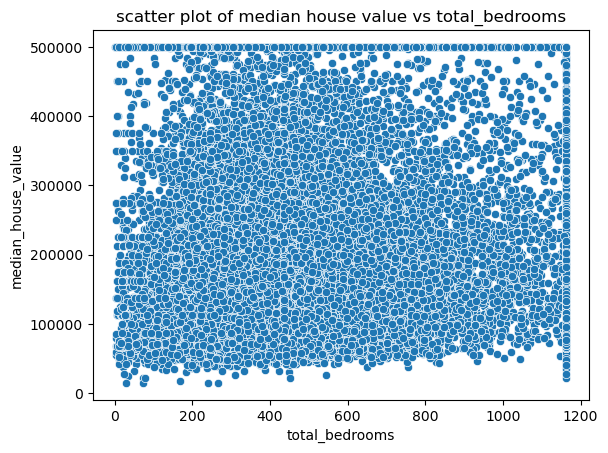

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


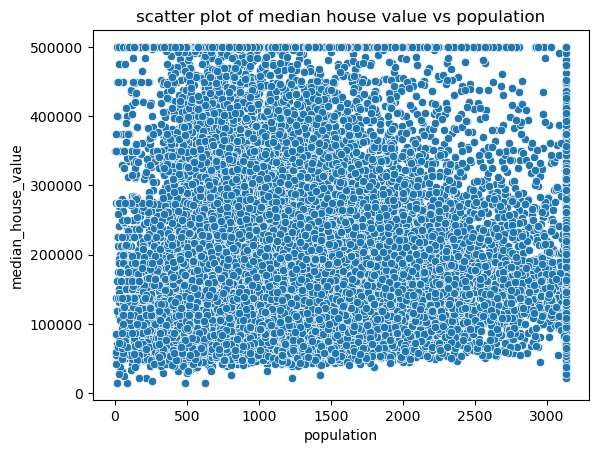

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


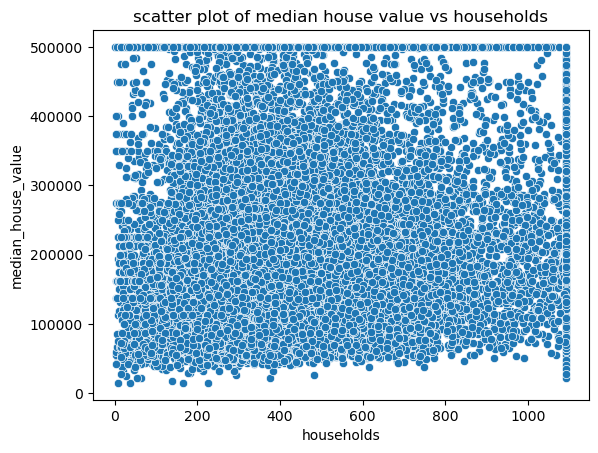

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


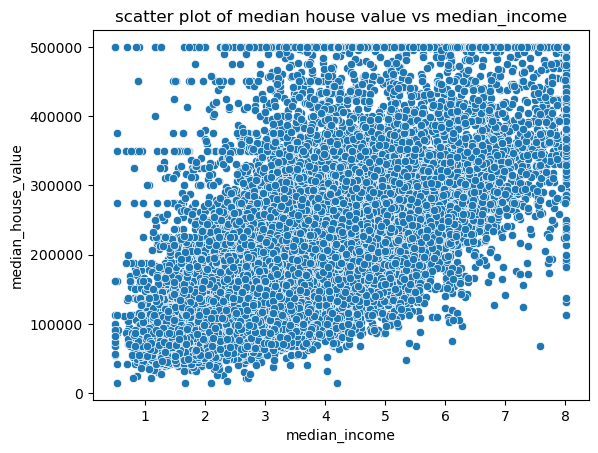

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


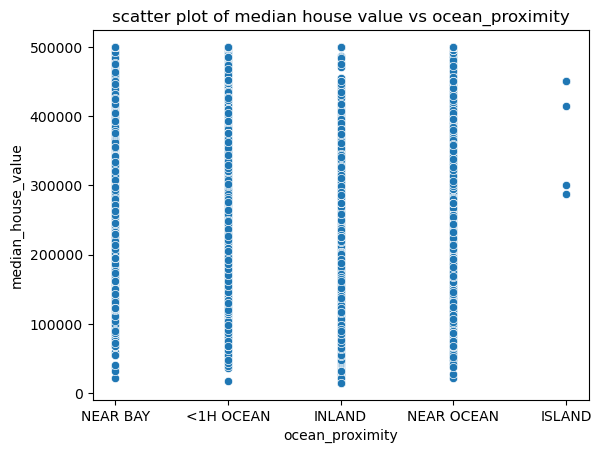

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


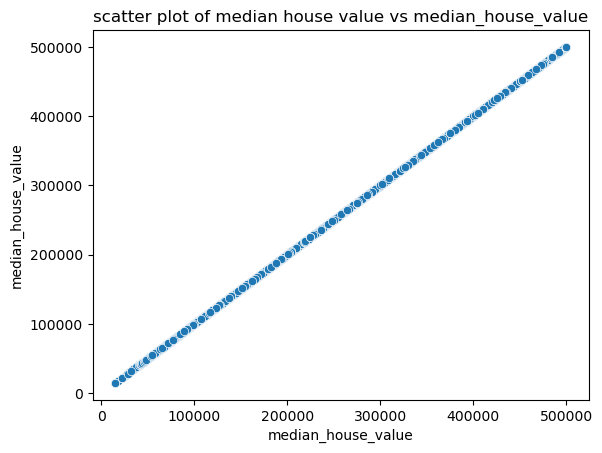

In [25]:
for column in df.columns:
    sns.scatterplot(df[column],df['median_house_value'])
    plt.title(f'scatter plot of median house value vs {column}')
    plt.show()

In [26]:
#categorical label encoding
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder(sparse=False,dtype=np.int32)

In [27]:
oceanprox=one.fit_transform(df[['ocean_proximity']])

In [28]:
oceanprox

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [29]:
label=one.get_feature_names(['ocean_proximity'])

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [30]:
label

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [31]:
ocean_df=pd.DataFrame(oceanprox,columns=label)

In [32]:
ocean_df

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [33]:
df.drop(columns=['ocean_proximity'], inplace=True)

In [34]:
df=pd.concat([df,ocean_df],axis=1)

In [35]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880.000,129.0,322.0,126.0,8.013025,452600,0,0,0,1,0
1,-122.22,37.86,21,5698.375,1106.0,2401.0,1092.5,8.013025,358500,0,0,0,1,0
2,-122.24,37.85,52,1467.000,190.0,496.0,177.0,7.257400,352100,0,0,0,1,0
3,-122.25,37.85,52,1274.000,235.0,558.0,219.0,5.643100,341300,0,0,0,1,0
4,-122.25,37.85,52,1627.000,280.0,565.0,259.0,3.846200,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665.000,374.0,845.0,330.0,1.560300,78100,0,1,0,0,0
20636,-121.21,39.49,18,697.000,150.0,356.0,114.0,2.556800,77100,0,1,0,0,0
20637,-121.22,39.43,17,2254.000,485.0,1007.0,433.0,1.700000,92300,0,1,0,0,0
20638,-121.32,39.43,18,1860.000,409.0,741.0,349.0,1.867200,84700,0,1,0,0,0


In [36]:
df=df.rename(columns={'ocean_proximity_<1H OCEAN':'ocean_proximity_1H_OCEAN'})

In [37]:
x=df.drop(['median_house_value'],axis=1)
y=df.median_house_value

In [38]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_1H_OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880.000,129.0,322.0,126.0,8.013025,0,0,0,1,0
1,-122.22,37.86,21,5698.375,1106.0,2401.0,1092.5,8.013025,0,0,0,1,0
2,-122.24,37.85,52,1467.000,190.0,496.0,177.0,7.257400,0,0,0,1,0
3,-122.25,37.85,52,1274.000,235.0,558.0,219.0,5.643100,0,0,0,1,0
4,-122.25,37.85,52,1627.000,280.0,565.0,259.0,3.846200,0,0,0,1,0


In [39]:
x.dtypes

longitude                     float64
latitude                      float64
housing_median_age              int64
total_rooms                   float64
total_bedrooms                float64
population                    float64
households                    float64
median_income                 float64
ocean_proximity_1H_OCEAN        int32
ocean_proximity_INLAND          int32
ocean_proximity_ISLAND          int32
ocean_proximity_NEAR BAY        int32
ocean_proximity_NEAR OCEAN      int32
dtype: object

In [40]:
y.head()

0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [42]:
from sklearn.tree import DecisionTreeRegressor
Dreg=DecisionTreeRegressor(max_depth=5)
Dreg.fit(x_train,y_train)


DecisionTreeRegressor(max_depth=5)

In [45]:
def model_evaluation(y_pred_test,y_pred_train,MODEL):
        #model evaluation
        print('-'*30)
        print(MODEL)
        print('-'*30)
        mae = mean_absolute_error(y_test, y_pred_test)
        mse = mean_squared_error(y_test, y_pred_test)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred_test)
        print('PERFORMANCE OF TEST DATA')
        print("Mean Absolute Error:", mae)
        print("Mean Squared Error:", mse)
        print("Root Mean Squared Error:", rmse)
        print("R-squared:", r2)
        n = x_test.shape[0] # number of samples
        p = x_test.shape[1] # number of predictors
        adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
        print("Adjusted R-squared:", adjusted_r2)
        print()
        print('PERFORMANCE OF TRAINING DATA')
        mae = mean_absolute_error(y_train, y_pred_train)
        mse = mean_squared_error(y_train, y_pred_train)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_train, y_pred_train)
        print("Mean Absolute Error:", mae)
        print("Mean Squared Error:", mse)
        print("Root Mean Squared Error:", rmse)
        print("R-squared:", r2)

        n = x_test.shape[0] # number of samples
        p = x_test.shape[1] # number of predictors
        adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
        print("Adjusted R-squared:", adjusted_r2)



In [46]:
y_pred_test=Dreg.predict(x_test)
y_pred_train=Dreg.predict(x_train)
model_evaluation(y_pred_test,y_pred_train,"DecisionTreeModel")

------------------------------
DecisionTreeModel
------------------------------
PERFORMANCE OF TEST DATA
Mean Absolute Error: 49896.93285005054
Mean Squared Error: 4836462266.912949
Root Mean Squared Error: 69544.67820698395
R-squared: 0.6296981028773707
Adjusted R-squared: 0.6285279704849074

PERFORMANCE OF TRAINING DATA
Mean Absolute Error: 49416.488467580275
Mean Squared Error: 4820547296.049267
Root Mean Squared Error: 69430.16128491469
R-squared: 0.6396714008578913
Adjusted R-squared: 0.6385327835052304


In [47]:
#model building
from sklearn.ensemble import RandomForestRegressor

In [48]:
Rforest= RandomForestRegressor(n_estimators=500, max_depth=6, random_state=0)
Rforest.fit(x_train,y_train)

RandomForestRegressor(max_depth=6, n_estimators=500, random_state=0)

In [49]:
y_pred_test=Rforest.predict(x_test)
y_pred_train=Rforest.predict(x_train)

In [50]:
model_evaluation(y_pred_test,y_pred_train,"RandomForestModel")

------------------------------
RandomForestModel
------------------------------
PERFORMANCE OF TEST DATA
Mean Absolute Error: 45403.64162175333
Mean Squared Error: 4069375121.797261
Root Mean Squared Error: 63791.65401365026
R-squared: 0.688429838889865
Adjusted R-squared: 0.6874452953569452

PERFORMANCE OF TRAINING DATA
Mean Absolute Error: 44158.216781292576
Mean Squared Error: 3864463385.8306937
Root Mean Squared Error: 62164.808258617624
R-squared: 0.711137223071421
Adjusted R-squared: 0.7102244335478256


In [51]:
from sklearn.ensemble import GradientBoostingRegressor
GBRmodel = GradientBoostingRegressor()
GBRmodel.fit(x_train, y_train)
y_pred_test = GBRmodel.predict(x_test)
y_pred_train=GBRmodel.predict(x_train)

In [52]:
model_evaluation(y_pred_test,y_pred_train,"GradientBoostingModel")

------------------------------
GradientBoostingModel
------------------------------
PERFORMANCE OF TEST DATA
Mean Absolute Error: 38791.70523864211
Mean Squared Error: 3097919347.330229
Root Mean Squared Error: 55658.95567947919
R-squared: 0.7628089814124608
Adjusted R-squared: 0.7620594716308278

PERFORMANCE OF TRAINING DATA
Mean Absolute Error: 37211.69956589423
Mean Squared Error: 2842305316.857458
Root Mean Squared Error: 53313.275240388844
R-squared: 0.7875419884383709
Adjusted R-squared: 0.7868706335160809


In [53]:
import pickle
pickle.dump(GBRmodel,open('GBRmodel.pkl','wb'))